Let's try to replicate the following R code / visualizations in Python:

https://blakocha.github.io/DAR2025/Notes20251117.html

In [ ]:
# pip install kagglehub

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhilash04/fathersandsonheight")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\lab821-17\.cache\kagglehub\datasets\abhilash04\fathersandsonheight\versions\1


In [14]:
import pandas as pd
import os

csv_path = os.path.join(path, "Pearson.txt")  # filename may vary
df = pd.read_csv(csv_path, sep="\t")

print(df.head())

   Father   Son
0    65.0  59.8
1    63.3  63.2
2    65.0  63.3
3    65.8  62.8
4    61.1  64.3


In [8]:
# pip install plotnine

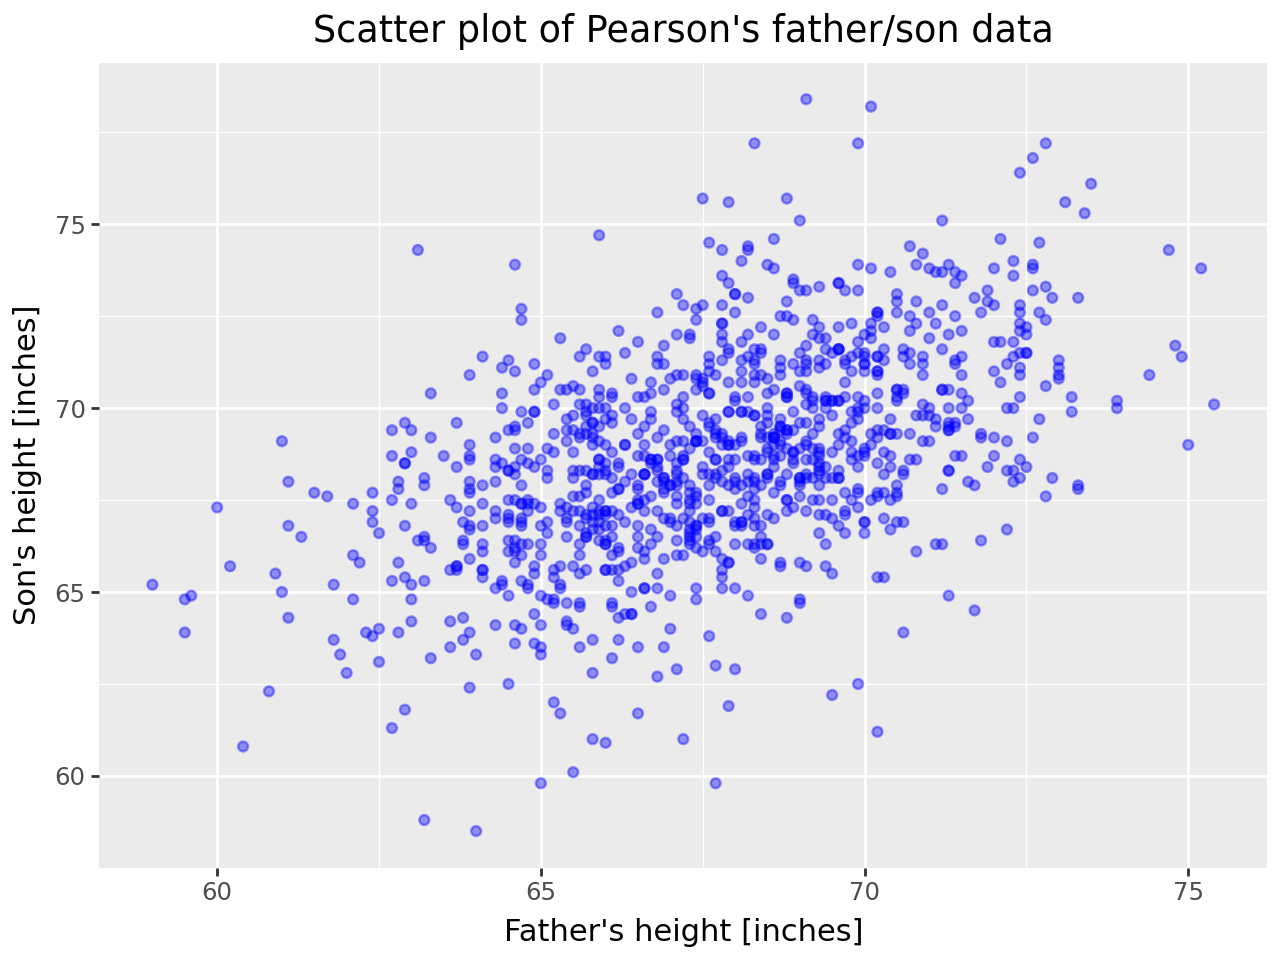

In [40]:
from plotnine import *

(
ggplot(data = df, mapping = aes(x = "Father", y = "Son")) + 
  geom_point(alpha=0.4, colour="blue") +
  xlab("Father's height [inches]") +
  ylab("Son's height [inches]") +
  ggtitle("Scatter plot of Pearson's father/son data")
 )

In [44]:
# Auxiliary table with the families where rounded height of the father is 70 inches
df70 = df.loc[ round(df['Father']) == 70 ]
print(df70.head())

    Father   Son
21    69.5  65.5
49    69.6  69.0
68    69.6  66.8
69    70.4  66.7
70    70.0  66.9


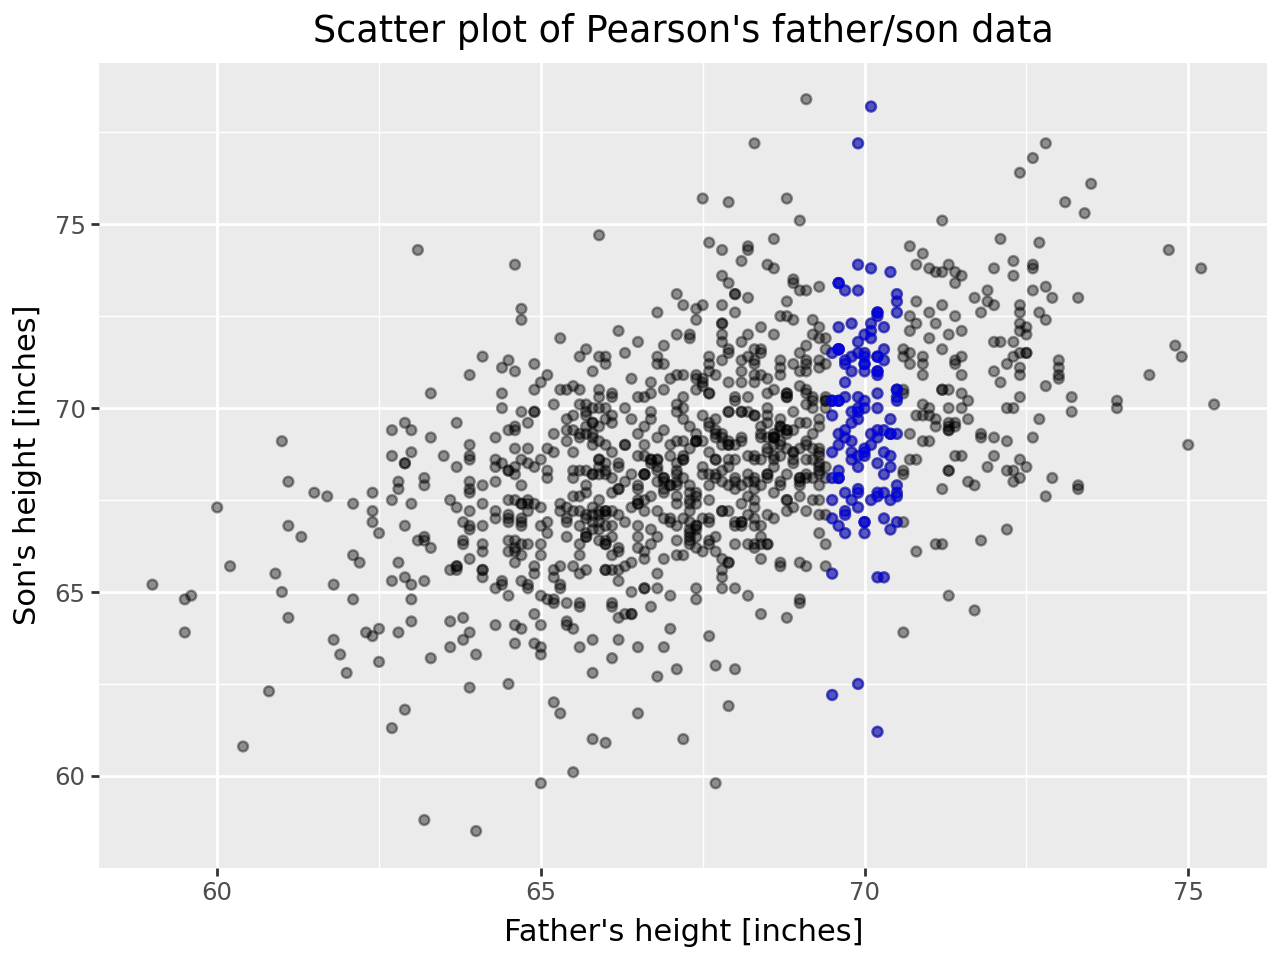

In [45]:
(
ggplot(data = df, mapping = aes(x = "Father", y = "Son")) + 
  geom_point(alpha=0.4, colour="black") +
  geom_point(data = df70, alpha = 0.4, colour = "blue") +
  xlab("Father's height [inches]") +
  ylab("Son's height [inches]") +
  ggtitle("Scatter plot of Pearson's father/son data")
 )

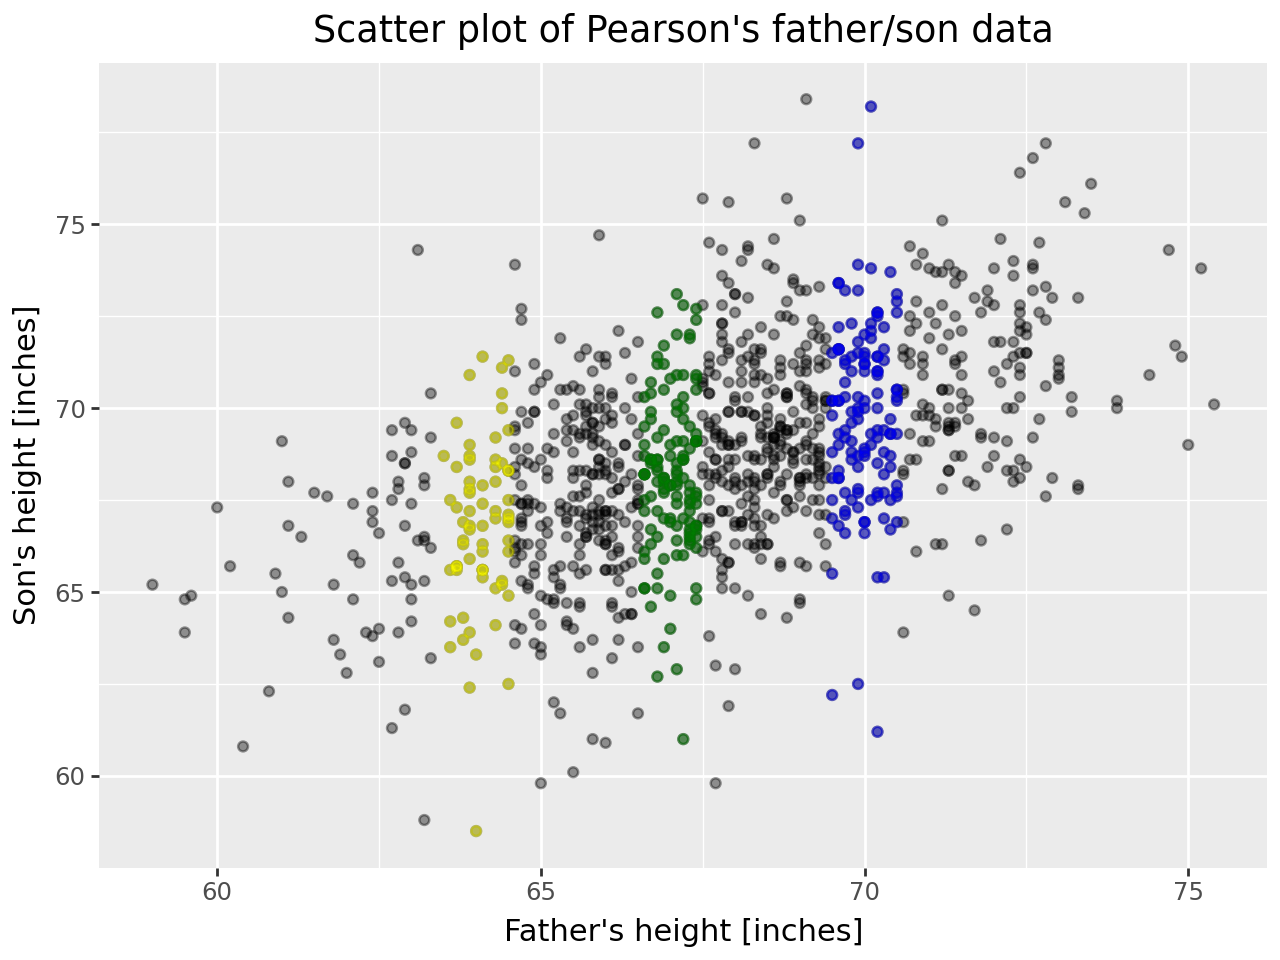

In [47]:
df64 = df.loc[ round(df['Father']) == 64 ]
df67 = df.loc[ round(df['Father']) == 67 ]

(
ggplot(data = df, mapping = aes(x = "Father", y = "Son")) + 
  geom_point(alpha=0.4, colour="black") +
  geom_point(data = df64, alpha = 0.4, colour = "yellow") +
  geom_point(data = df67, alpha = 0.4, colour = "green") +
  geom_point(data = df70, alpha = 0.4, colour = "blue") +
  xlab("Father's height [inches]") +
  ylab("Son's height [inches]") +
  ggtitle("Scatter plot of Pearson's father/son data")
 )

In [49]:
avgs_64 = np.mean(df64['Son'])
print(avgs_64)
avgs_67 = np.mean(df67['Son'])
print(avgs_67)
avgs_70 = np.mean(df70['Son'])
print(avgs_70)

66.83484848484848
68.15203252032519
69.71023622047245


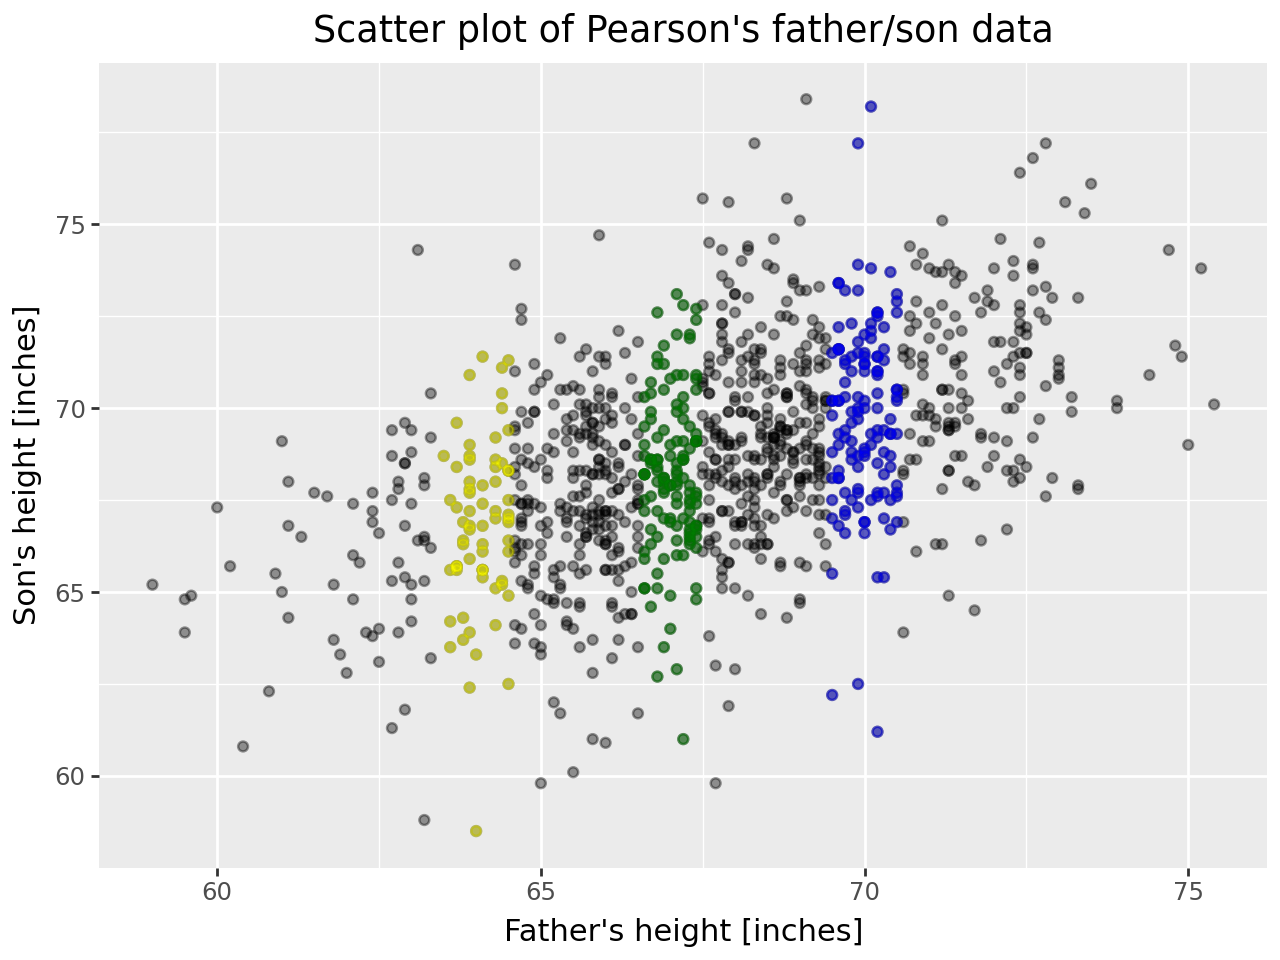

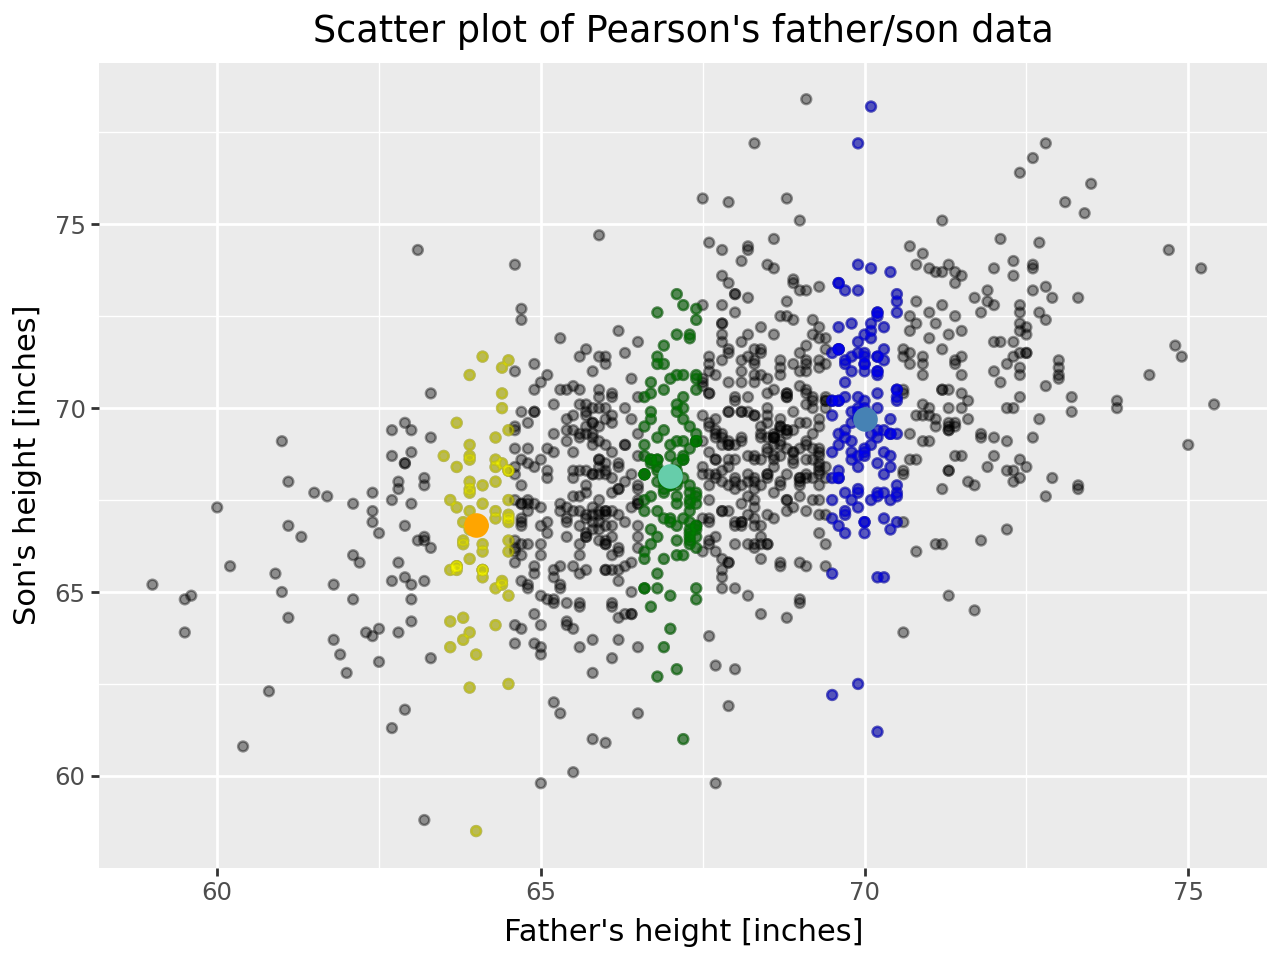

In [63]:
G = (
ggplot(data = df, mapping = aes(x = "Father", y = "Son")) + 
  geom_point(alpha=0.4, colour="black") +
  geom_point(data = df64, alpha = 0.4, colour = "yellow") +
  geom_point(data = df67, alpha = 0.4, colour = "green") +
  geom_point(data = df70, alpha = 0.4, colour = "blue") +
  xlab("Father's height [inches]") +
  ylab("Son's height [inches]") +
  ggtitle("Scatter plot of Pearson's father/son data")
 )

G.show()

G2 = (
G + 
geom_point(data=pd.DataFrame({"Father": [64], "Son": [avgs_64]}),
  color="orange", size=4) + 
geom_point(data=pd.DataFrame({"Father": [67], "Son": [avgs_67]}),
  color="mediumaquamarine", size=4) + 
geom_point(data=pd.DataFrame({"Father": [70], "Son": [avgs_70]}),
  color="steelblue", size=4)
  )

G2.show()

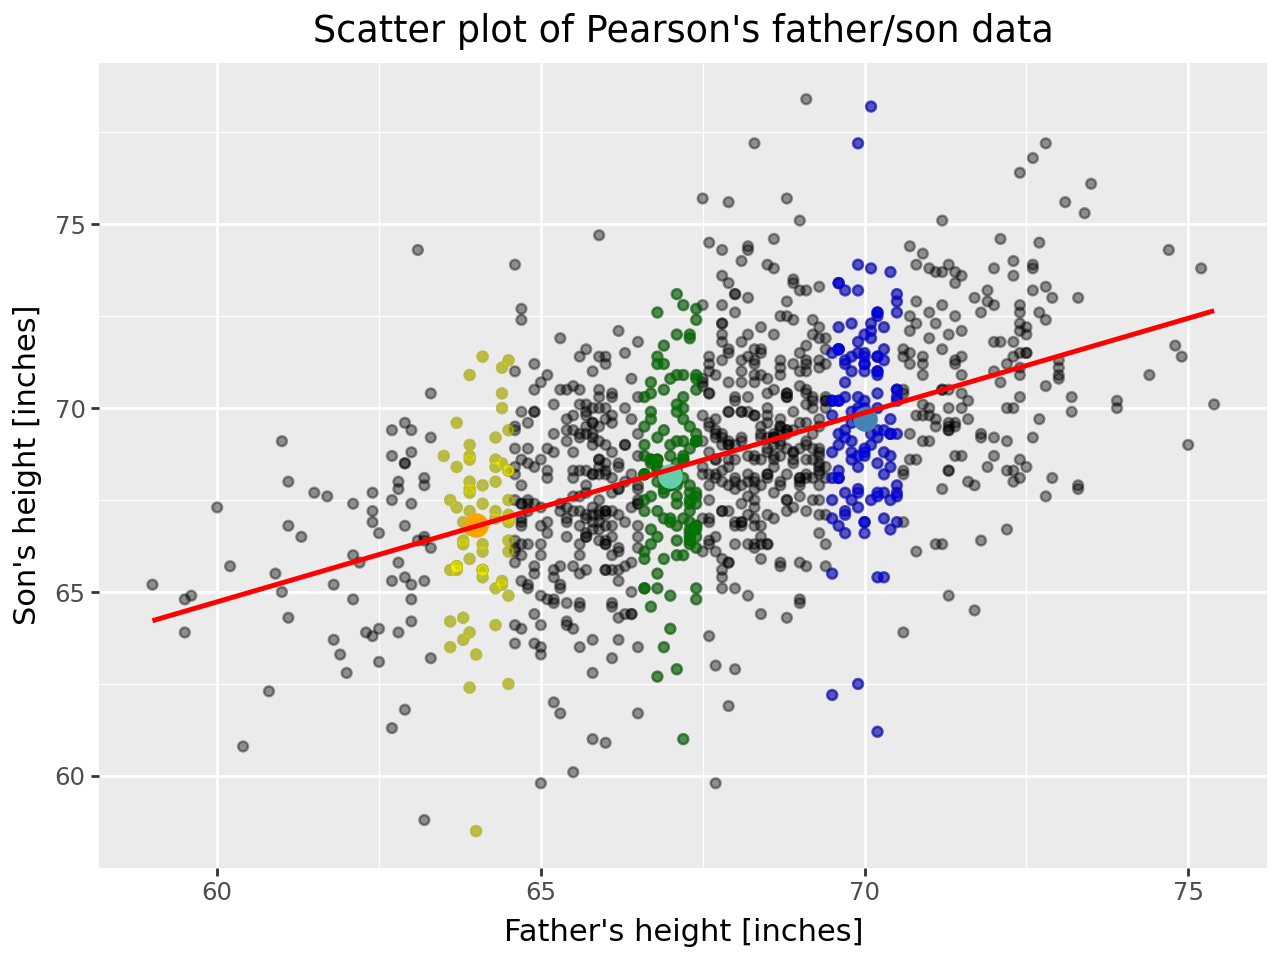

In [67]:
G2 + geom_smooth(method="lm", colour="red", se=False)

In [73]:
from scipy import stats

stats.linregress(df['Father'], df['Son'])

LinregressResult(slope=np.float64(0.5140059125455921), intercept=np.float64(33.8928005406617), rvalue=np.float64(0.5011626808075907), pvalue=np.float64(1.2729275743665088e-69), stderr=np.float64(0.027056810703987993), intercept_stderr=np.float64(1.832894576711838))

In [74]:
import statsmodels.formula.api as smf
model = smf.ols("Son ~ Father", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Son   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     360.9
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.27e-69
Time:                        10:16:27   Log-Likelihood:                -2489.4
No. Observations:                1078   AIC:                             4983.
Df Residuals:                    1076   BIC:                             4993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.8928      1.833     18.491      0.0

In [88]:
df_long = df.melt(value_vars=["Father", "Son"],
        var_name="group",
        value_name="height")
print(df_long.head())
print(df_long.tail())

    group  height
0  Father    65.0
1  Father    63.3
2  Father    65.0
3  Father    65.8
4  Father    61.1
     group  height
2151   Son    70.8
2152   Son    68.3
2153   Son    69.3
2154   Son    69.3
2155   Son    67.0


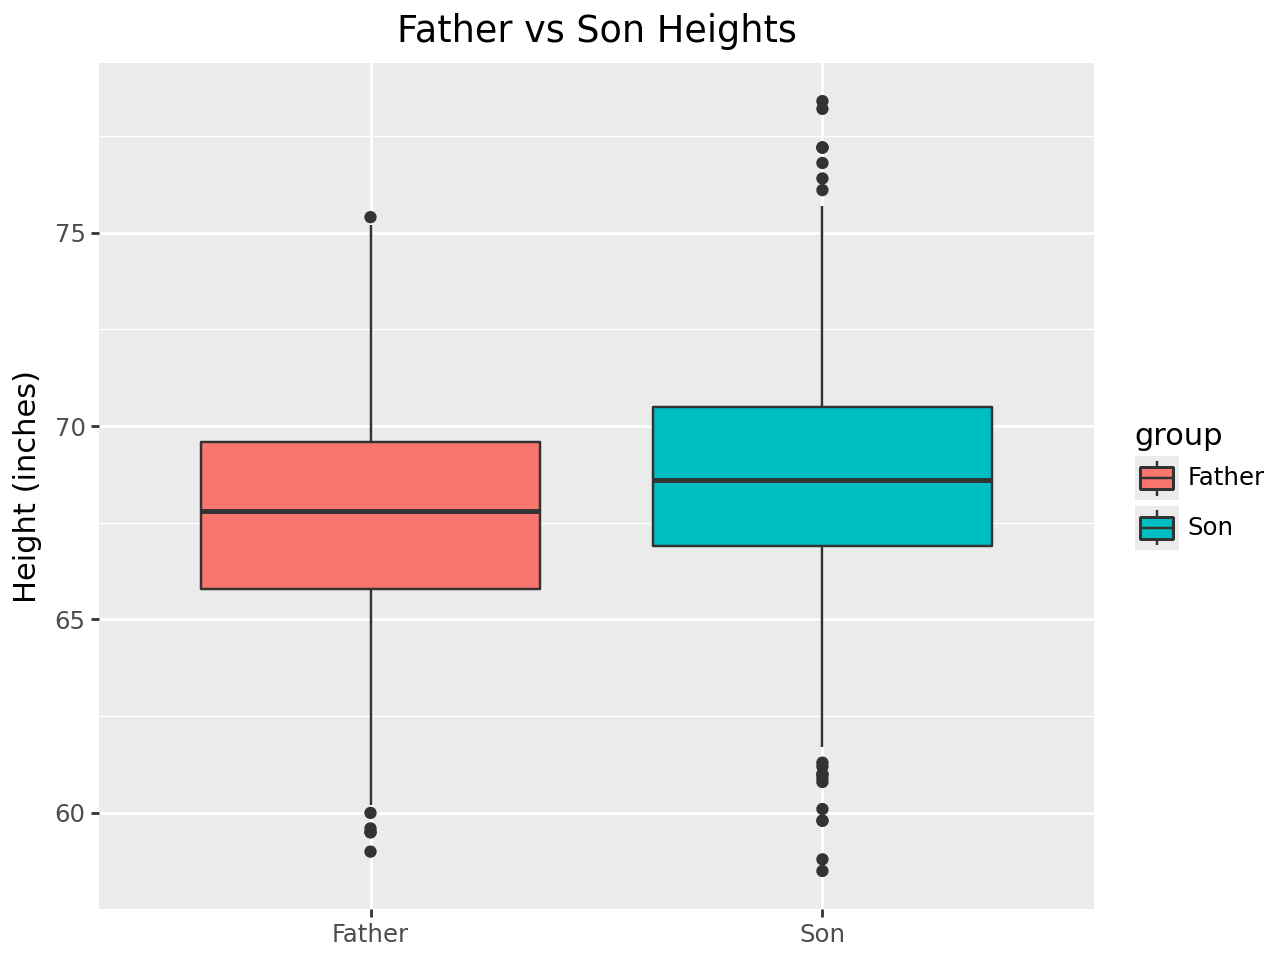

In [93]:
(ggplot(df_long, aes(y = "height", x = "group", fill = "group")) +
  geom_boxplot() +
  labs(x = "", y = "Height (inches)", title = "Father vs Son Heights"))

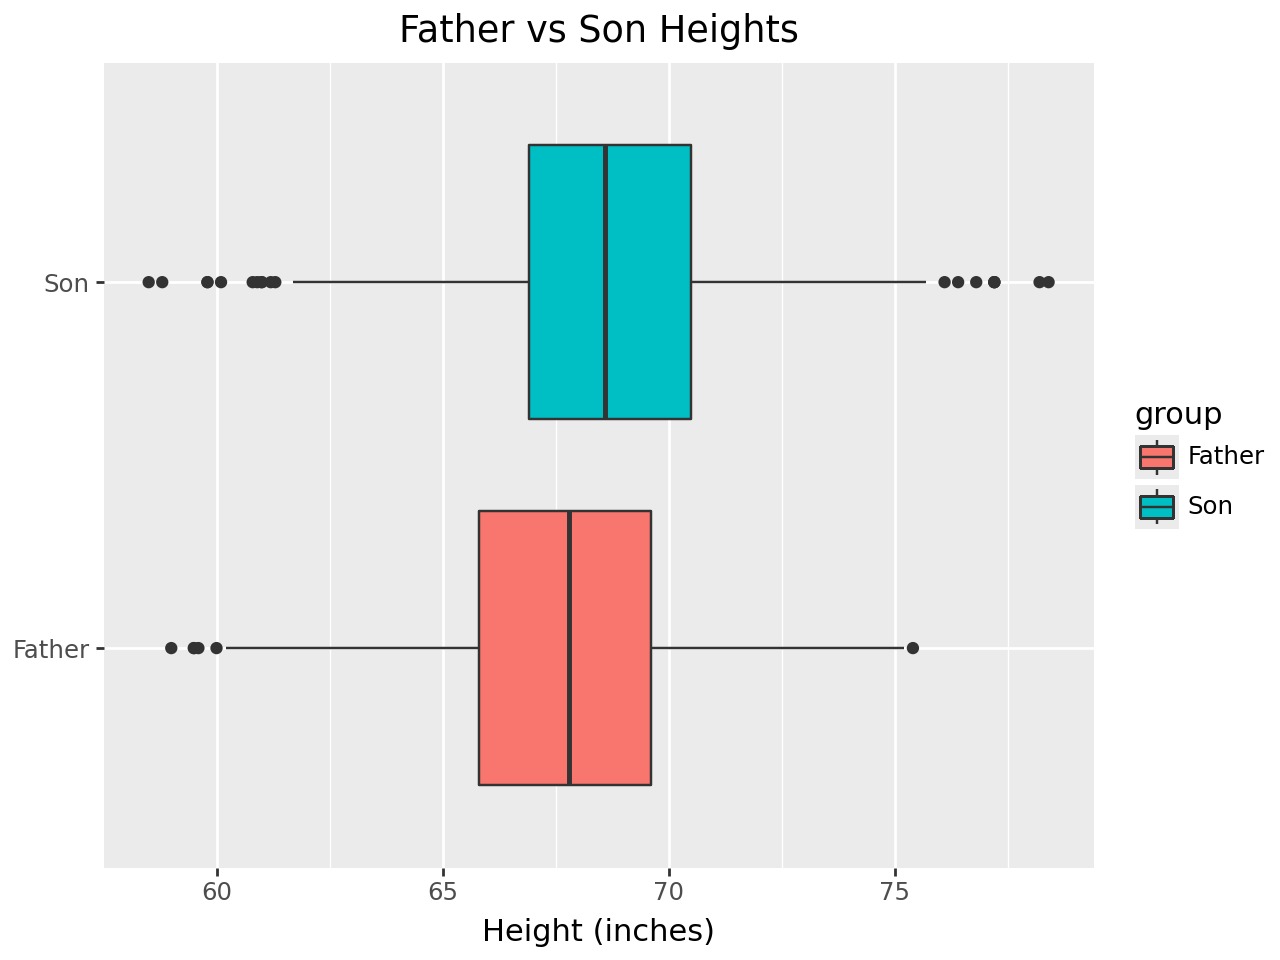

In [95]:
(ggplot(df_long, aes(y = "height", x = "group", fill = "group")) +
  geom_boxplot() +
  labs(x = "", y = "Height (inches)", title = "Father vs Son Heights") +
  coord_flip())

Violin plot and the legend turned off. 

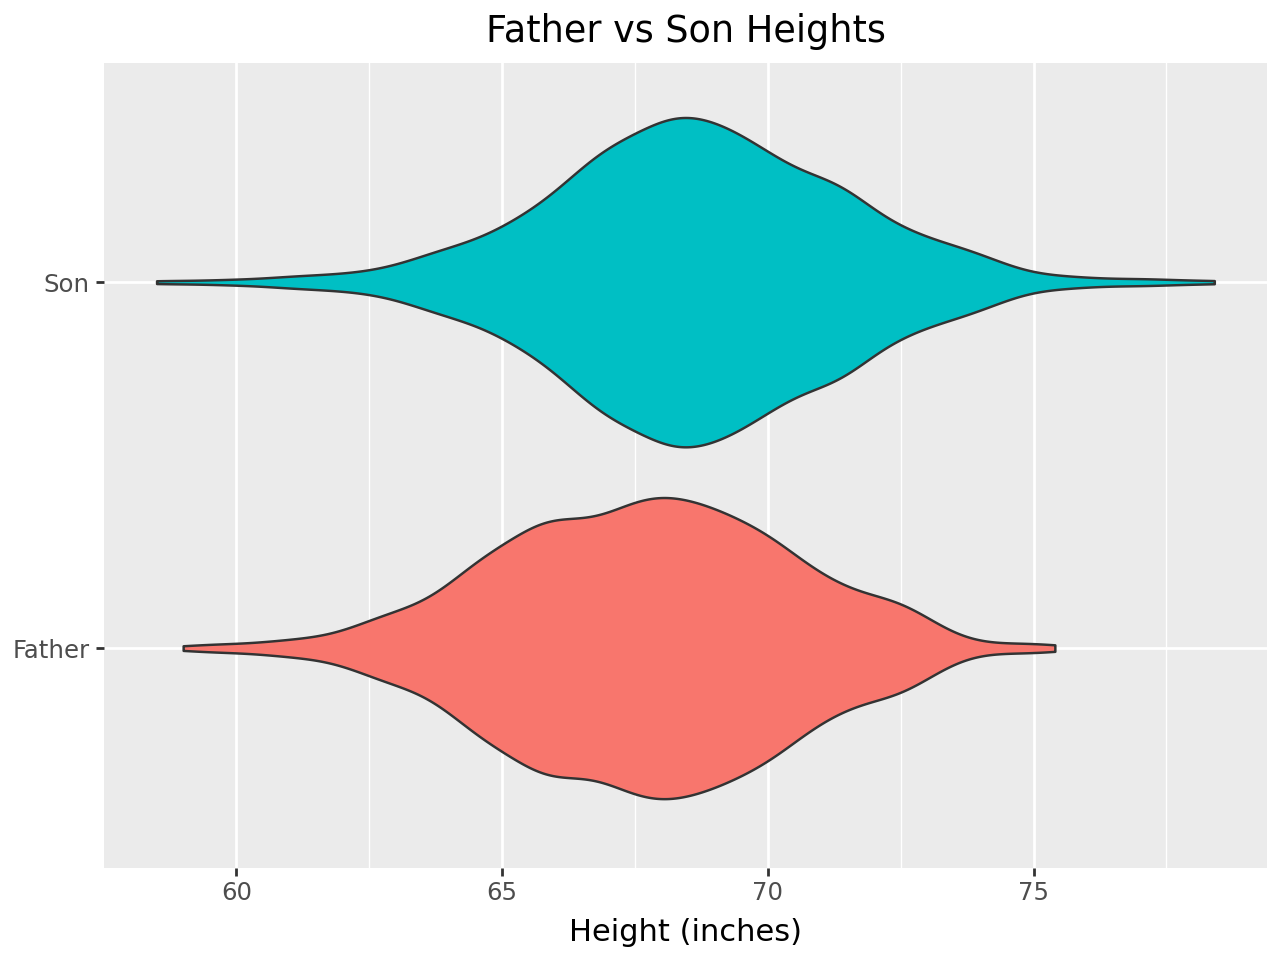

In [97]:
(ggplot(df_long, aes(y = "height", x = "group", fill = "group")) +
  geom_violin() +
  labs(x = "", y = "Height (inches)", title = "Father vs Son Heights") +
  coord_flip() +
  theme(legend_position="none")
  )

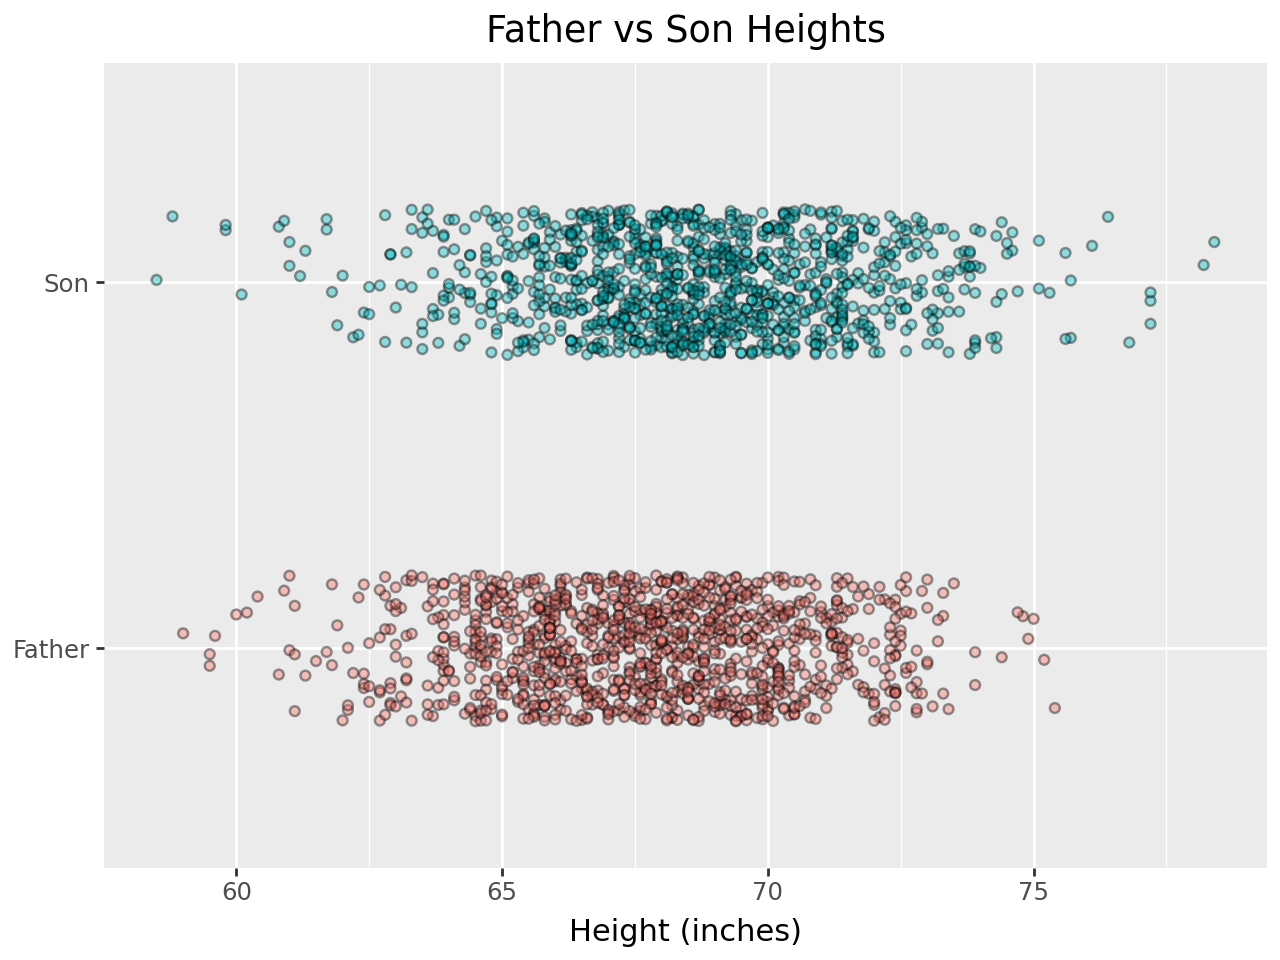

In [100]:
(ggplot(df_long, aes(y = "height", x = "group", fill = "group")) +
  geom_jitter(width = 0.2, height = 0, alpha = 0.4) +
  labs(x = "", y = "Height (inches)", title = "Father vs Son Heights") +
  coord_flip() +
  theme(legend_position="none")
  )